<a href="https://colab.research.google.com/github/Pranjali012/Crack-Detection-using-Deep-learning-and-Transfer-learning-models/blob/main/Road_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 2s (148 kB/s)
Selecting previously unselected package rar.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!unrar x  "/content/drive/MyDrive/Concrete Crack Images for Classification.rar" "/content/drive/MyDrive"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/Negative/15002.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15003.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15004.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15005.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15006.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15007.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15008.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15009.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15010.jpg                     88%  OK 
Extracting  /content/drive/MyDrive/Negative/15011.jpg                     88%  OK 
Extracting  /content/drive/My

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
positive_dir=Path("/content/drive/MyDrive/Positive")
negative_dir=Path("/content/drive/MyDrive/Negative")

In [ ]:
def DataFrame_create(image_dir,label):
    filepaths=pd.Series(list(image_dir.glob(r"*.jpg")),name="Filepath").astype(str)
    labels=pd.Series(label,name="label",index=filepaths.index)
    dataframe=pd.concat([filepaths,labels],axis=1)
    
    return dataframe

In [ ]:
positive_df=DataFrame_create(positive_dir,label="positive")
negative_df=DataFrame_create(negative_dir,label="negative")

In [ ]:
df=pd.concat([positive_df,negative_df],axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df.head()

,Filepath,label
0,/content/drive/MyDrive/Positive/02117.jpg,positive
1,/content/drive/MyDrive/Negative/14203.jpg,negative
2,/content/drive/MyDrive/Negative/03289.jpg,negative
3,/content/drive/MyDrive/Positive/04203.jpg,positive
4,/content/drive/MyDrive/Positive/07756.jpg,positive


In [ ]:
train_df,test_df=train_test_split(df,test_size=0.2,shuffle=True,random_state=101)

In [ ]:
train_gen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,validation_split=0.2)

test_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_gen.flow_from_dataframe(train_df,
                                         
                                        x_col="Filepath",
                                        y_col="label",target_size=(128,128),
                                        color_mode="rgb",batch_size=32,class_mode="binary",shuffle=True,seed=42,subset="training")

val_data=train_gen.flow_from_dataframe(train_df,x_col="Filepath",
                                        y_col="label",target_size=(128,128),
                                        color_mode="rgb",batch_size=32,class_mode="binary",shuffle=True,seed=42,subset="validation")

test_data=test_gen.flow_from_dataframe(test_df,
                                      x_col="Filepath",
                                        y_col="label",target_size=(128,128),
                                        color_mode="rgb",batch_size=32,class_mode="binary",shuffle=False,seed=42)

Found 24248 validated image filenames belonging to 2 classes.
Found 6061 validated image filenames belonging to 2 classes.
Found 7578 validated image filenames belonging to 2 classes.


In [ ]:
input=layers.Input(shape=(128,128,3))
x=layers.Conv2D(16,3,activation="relu")(input)
x=layers.MaxPool2D((2,2))(x)

x=layers.Conv2D(32,3,activation="relu")(x)
x=layers.MaxPool2D((2,2))(x)
x=layers.GlobalAveragePooling2D()(x)

output=layers.Dense(1,activation="sigmoid")(x)

model=tf.keras.Model(input,output)

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 32)               0   

In [ ]:
h=model.fit(train_data,validation_data=val_data,epochs=10,callbacks=[
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",restore_best_weights=True,patience=3)])

Epoch 1/10
758/758 [==============================] - 340s 447ms/step - loss: 0.4491 - accuracy: 0.8081 - val_loss: 0.1942 - val_accuracy: 0.9495
Epoch 2/10
758/758 [==============================] - 332s 438ms/step - loss: 0.1479 - accuracy: 0.9598 - val_loss: 0.1046 - val_accuracy: 0.9738
Epoch 3/10
758/758 [==============================] - 337s 445ms/step - loss: 0.1057 - accuracy: 0.9687 - val_loss: 0.0867 - val_accuracy: 0.9762
Epoch 4/10
758/758 [==============================] - 336s 443ms/step - loss: 0.0910 - accuracy: 0.9728 - val_loss: 0.0671 - val_accuracy: 0.9762
Epoch 5/10
758/758 [==============================] - 331s 437ms/step - loss: 0.0815 - accuracy: 0.9750 - val_loss: 0.0724 - val_accuracy: 0.9748
Epoch 6/10
758/758 [==============================] - 332s 438ms/step - loss: 0.0766 - accuracy: 0.9759 - val_loss: 0.0847 - val_accuracy: 0.9757
Epoch 7/10
758/758 [==============================] - 331s 436ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0617 -

In [ ]:
import plotly.express as px
fig=px.line(h.history,
           y=["loss","val_loss"],
           labels={"index":"epochs","value":"loss"},
           title="train & val loss")
fig.show()

In [ ]:
def evaluate_model(model,test_data):
    
    result=model.evaluate(test_data,verbose=0)
    loss=result[0]
    accuracy=result[1]
    
    print("test loss: {:.5f}".format(loss))
    print("test acc: {:.2f}".format(accuracy*100))
    
    y_pred=np.squeeze((model.predict(test_data)>=0.5).astype(np.int))
    cm=confusion_matrix(test_data.labels,y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

test loss: 0.07500
test acc: 97.43


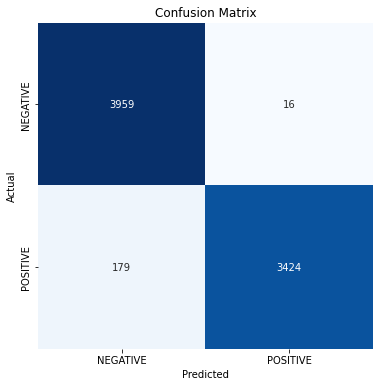

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      1.00      0.98      3975
    POSITIVE       1.00      0.95      0.97      3603

    accuracy                           0.97      7578
   macro avg       0.98      0.97      0.97      7578
weighted avg       0.98      0.97      0.97      7578



In [ ]:
evaluate_model(model,test_data)

In [ ]:
import plotly.express as px
fig=px.line(h.history,
           y=["accuracy","val_accuracy"],
           labels={"index":"epochs","value":"accuracy"},
           title="train & val accuracy")
fig.show()